In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

比較データの整形、連続値から0~1へ、groundtruth順に予測値も並び替え

In [8]:
def normalize(ndarray):
    min_value = ndarray.min()
    max_value = ndarray.max()
    nor = (ndarray - min_value).astype(float) / (max_value - min_value).astype(float)
    return nor

In [2]:
estimated_df = pd.read_csv('../result/pg1w200_mean.csv')
estimated_g = estimated_df['eap'][0:470].get_values()
gdf = pd.read_csv('../dataset/peer_review/translated_groundtruth.csv')
truth = gdf['grade'].get_values()

In [12]:
np.ones(470)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [11]:
np.corrcoef(truth,np.ones(470))

array([[  1.,  nan],
       [ nan,  nan]])

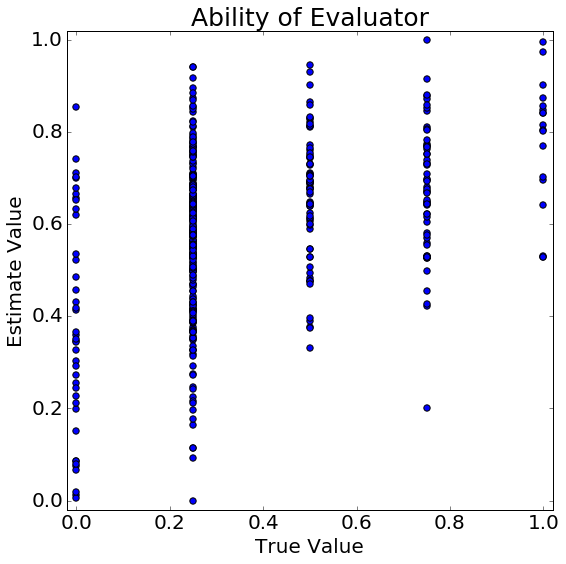

In [4]:
plt.figure(figsize=(8, 8))

plt.xlim(-0.02,1.02)
plt.xticks(fontsize=20)
plt.xlabel("True Value",fontsize=20)
plt.ylim(-0.02, 1.02)
plt.yticks(fontsize=20)
plt.ylabel("Estimate Value",fontsize=20)

x = normalize(truth)
y= normalize(estimated_g)
plt.scatter(x,y, s=40)

plt.title("Ability of Evaluator", fontsize=25)
plt.tight_layout()
plt.show()
#plt.savefig(task_name+"/reliability_scatter.eps",bbox_inches="tight", pad_inches=0.1, dpi=300, format = 'eps')

In [4]:
np.corrcoef(truth,estimated_g)[0,1]

0.40675485418828622

pc1

In [5]:
estimated_df = pd.read_csv('../result/pc1w200_mean.csv')
estimated_c = estimated_df['eap'][0:470].get_values()
gdf = pd.read_csv('../dataset/peer_review/translated_groundtruth.csv')
truth = gdf['grade'].get_values()

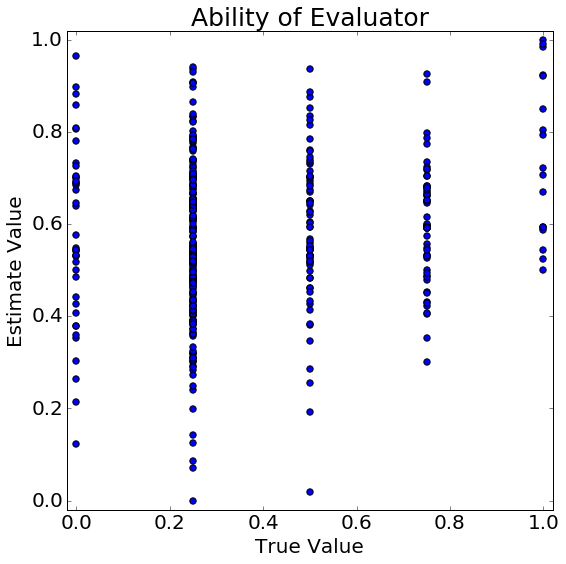

In [7]:
plt.figure(figsize=(8, 8))

plt.xlim(-0.02,1.02)
plt.xticks(fontsize=20)
plt.xlabel("True Value",fontsize=20)
plt.ylim(-0.02, 1.02)
plt.yticks(fontsize=20)
plt.ylabel("Estimate Value",fontsize=20)

x = normalize(truth)
y= normalize(estimated_c)
plt.scatter(x,y, s=40)

plt.title("Ability of Evaluator", fontsize=25)
plt.tight_layout()
plt.show()
#plt.savefig(task_name+"/reliability_scatter.eps",bbox_inches="tight", pad_inches=0.1, dpi=300, format = 'eps')

In [8]:
np.corrcoef(truth,estimated_c)[0,1]

0.17575873367973921

pg5

In [12]:
estimated_df = pd.read_csv('../result/pg5_5000w500_mean.csv')
estimated_g5 = estimated_df['eap'][0:470].get_values()
gdf = pd.read_csv('../dataset/peer_review/translated_groundtruth.csv')
truth = gdf['grade'].get_values()

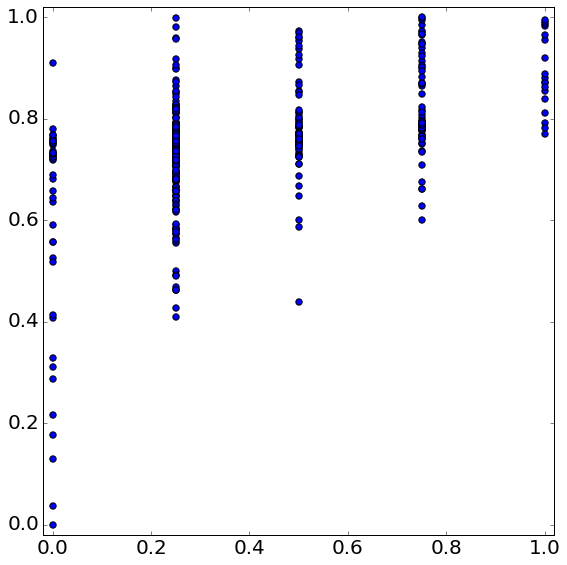

In [13]:
plt.figure(figsize=(8, 8))

plt.xlim(-0.02,1.02)
plt.xticks(fontsize=20)
#plt.xlabel("True Value",fontsize=20)
plt.ylim(-0.02, 1.02)
plt.yticks(fontsize=20)
#plt.ylabel("Estimate Value",fontsize=20)

x = normalize(truth)
y= normalize(estimated_c)
plt.scatter(x,y, s=40)

#plt.title("Ability of Evaluator", fontsize=25)
plt.tight_layout()
#plt.show()
plt.savefig("./scatterPG5.eps",bbox_inches="tight", pad_inches=0.1, dpi=300, format = 'eps')

In [14]:
np.corrcoef(truth,estimated_g5)[0,1]

0.47634282488847368

アンサンブル

In [24]:
for i in xrange(100):
    theta = i*0.01
    balance = theta*estimated_g + (1-theta)*estimated_c
    print(theta,np.corrcoef(truth, balance)[0,1])

(0.0, 0.17589759806412672)
(0.01, 0.17942909896857687)
(0.02, 0.18300162399423484)
(0.03, 0.18661479325345801)
(0.04, 0.19026815128194199)
(0.05, 0.19396116269911828)
(0.06, 0.1976932078007147)
(0.07, 0.20146357810241414)
(0.08, 0.20527147185631348)
(0.09, 0.20911598956481914)
(0.1, 0.21299612951967867)
(0.11, 0.21691078339706113)
(0.12, 0.22085873194285127)
(0.13, 0.22483864078568896)
(0.14, 0.22884905641864042)
(0.15, 0.23288840239370301)
(0.16, 0.23695497577660229)
(0.17, 0.24104694391241857)
(0.18, 0.24516234155544492)
(0.19, 0.24929906841924265)
(0.2, 0.25345488720503107)
(0.21, 0.2576274221682251)
(0.22, 0.26181415828406152)
(0.23, 0.26601244107364896)
(0.24, 0.27021947715144295)
(0.25, 0.2744323355538919)
(0.26, 0.27864794990676639)
(0.27, 0.28286312148539566)
(0.28, 0.28707452321758359)
(0.29, 0.29127870467331035)
(0.3, 0.29547209807841929)
(0.31, 0.29965102538127386)
(0.32, 0.30381170639191829)
(0.33, 0.30795026800255415)
(0.34, 0.31206275448627591)
(0.35000000000000003, 0.316

In [25]:
balance = 0.8*estimated_g + (1-0.8)*estimated_c

In [26]:
np.corrcoef(truth,balance)

array([[ 1.        ,  0.41734526],
       [ 0.41734526,  1.        ]])

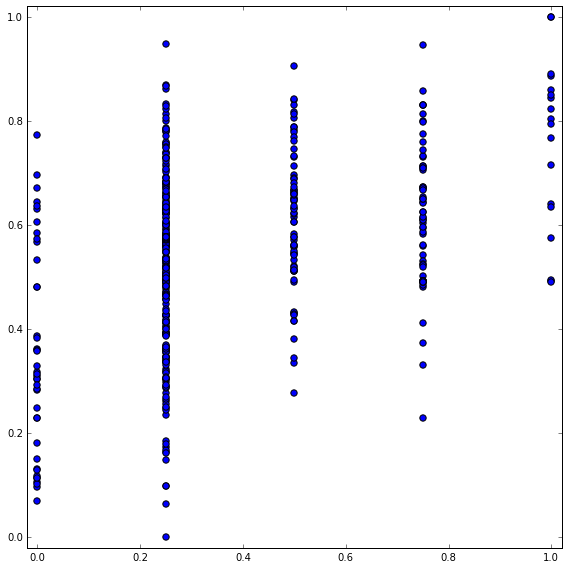

In [29]:
plt.figure(figsize=(8, 8))

plt.xlim(-0.02,1.02)
plt.ylim(-0.02, 1.02)

x = normalize(truth)
y= normalize(balance)
plt.scatter(x,y, s=40)

plt.tight_layout()
#plt.show()
plt.savefig("../result/display.eps",bbox_inches="tight", pad_inches=0.1, dpi=300, format = 'eps')

In [9]:
bias_g = estimated_df['eap'][470*2:470*3].get_values()

In [15]:
bias_c = estimated_df['eap'][470*1:470*2].get_values()

In [17]:
np.corrcoef(bias_g,bias_c)

array([[ 1.        ,  0.41360996],
       [ 0.41360996,  1.        ]])

PCG1

In [3]:
#estimated_df = pd.read_csv('../result/pcg1w200_mean.csv')
estimated_df = pd.read_csv('../result/pcg1_5000w500_mean.csv')
estimated_cg = estimated_df['eap'][0:470].get_values()
gdf = pd.read_csv('../dataset/peer_review/translated_groundtruth.csv')
truth = gdf['grade'].get_values()

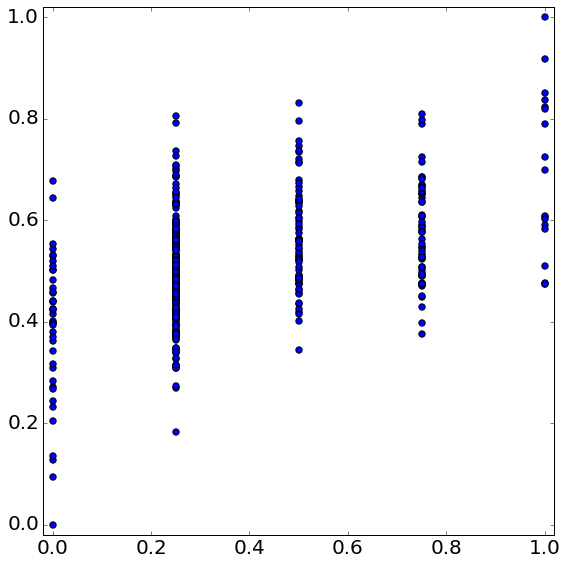

In [6]:
plt.figure(figsize=(8, 8))

plt.xlim(-0.02,1.02)
plt.xticks(fontsize=20)
#plt.xlabel("True Value",fontsize=20)
plt.ylim(-0.02, 1.02)
plt.yticks(fontsize=20)
#plt.ylabel("Estimate Value",fontsize=20)

x = normalize(truth)
y= normalize(estimated_cg)
plt.scatter(x,y, s=40)

#plt.title("Ability of Evaluator", fontsize=25)
plt.tight_layout()
#plt.show()
#plt.savefig("reliability_scatter+1.eps",bbox_inches="tight", pad_inches=0.1, dpi=300, format = 'eps')
plt.savefig("scatter.eps",bbox_inches="tight", pad_inches=0.1, dpi=300, format = 'eps')

In [5]:
np.corrcoef(truth,estimated_cg)[0,1]

0.46541443050962694

お試し

In [3]:
estimated_df = pd.read_csv('../result/pcg1_5000w500_mean.csv')
estimated_cg = estimated_df['eap'][0:470].get_values()
gdf = pd.read_csv('../dataset/peer_review/translated_groundtruth.csv')
truth = gdf['grade'].get_values()

/home/stakeru/.virtualenvs/pairwise/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1287: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/stakeru/.virtualenvs/pairwise/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=400:stretch=normal:size=25.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/home/stakeru/.virtualenvs/pairwise/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=400:stretch=normal:size=20.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


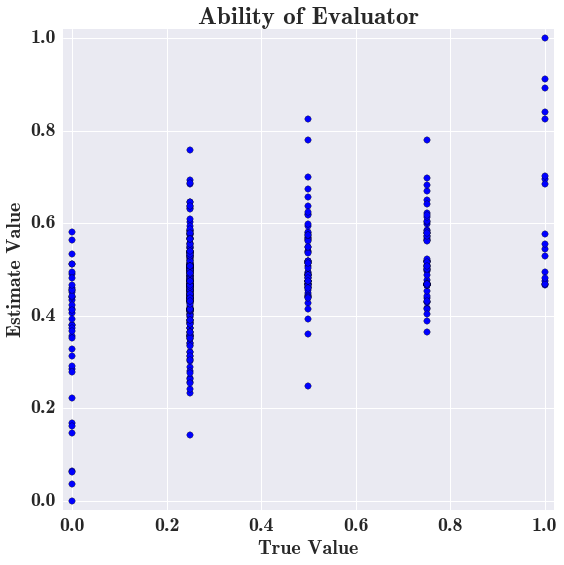

In [4]:
import seaborn as sns
plt.figure(figsize=(8, 8))

plt.xlim(-0.02,1.02)
plt.xticks(fontsize=20)
plt.xlabel("True Value",fontsize=20)
plt.ylim(-0.02, 1.02)
plt.yticks(fontsize=20)
plt.ylabel("Estimate Value",fontsize=20)

x = normalize(truth)
y= normalize(estimated_cg)
plt.scatter(x,y, s=40)
#ax = sns.violinplot(x=y)

plt.title("Ability of Evaluator", fontsize=25)
plt.tight_layout()
plt.show()
#plt.savefig("reliability_scatter+1.eps",bbox_inches="tight", pad_inches=0.1, dpi=300, format = 'eps')
plt.savefig("reliability_scatter.eps",bbox_inches="tight", pad_inches=0.1, dpi=300, format = 'eps')